#Importing & Understanding the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#If the data on Drive/ activate this code with suitable modifications
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/health_data.csv")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("medical_insurance.csv")   #-----> Define the dataset

FileNotFoundError: [Errno 2] No such file or directory: 'medical_insurance.csv'

In [ ]:
df

,Age,BMI,Blood_Pressure,Cholesterol,Disease,Smoker,Physical_Activity,Risk_Level
0,56,33.4,141,High,Hypertension,No,3,High Risk
1,69,22.2,105,High,Hypertension,Yes,3,High Risk
2,46,25.0,102,Normal,NaN,No,1,Low Risk
3,32,30.8,119,High,Diabetes,No,2,High Risk
4,60,21.9,108,High,Diabetes,No,2,High Risk
...,...,...,...,...,...,...,...,...
195,66,19.5,150,Normal,Hypertension,No,3,High Risk
196,69,18.9,143,High,Hypertension,Yes,3,High Risk
197,78,27.0,128,Normal,NaN,Yes,4,High Risk
198,49,27.2,163,Normal,NaN,Yes,5,High Risk


In [ ]:
df.head()

,Age,BMI,Blood_Pressure,Cholesterol,Disease,Smoker,Physical_Activity,Risk_Level
0,56,33.4,141,High,Hypertension,No,3,High Risk
1,69,22.2,105,High,Hypertension,Yes,3,High Risk
2,46,25.0,102,Normal,NaN,No,1,Low Risk
3,32,30.8,119,High,Diabetes,No,2,High Risk
4,60,21.9,108,High,Diabetes,No,2,High Risk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                200 non-null    int64  
 1   BMI                191 non-null    float64
 2   Blood_Pressure     200 non-null    int64  
 3   Cholesterol        200 non-null    object 
 4   Disease            126 non-null    object 
 5   Smoker             200 non-null    object 
 6   Physical_Activity  200 non-null    int64  
 7   Risk_Level         200 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 12.6+ KB


#Check for missing values

In [ ]:
df.isnull()

,Age,BMI,Blood_Pressure,Cholesterol,Disease,Smoker,Physical_Activity,Risk_Level
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False
197,False,False,False,False,True,False,False,False
198,False,False,False,False,True,False,False,False


In [ ]:
df.isnull().sum()

,0
Age,0
BMI,9
Blood_Pressure,0
Cholesterol,0
Disease,74
Smoker,0
Physical_Activity,0
Risk_Level,0


###Handling Missing Values

In [ ]:
# Option 1: Drop rows with missing values

df.dropna(inplace=True)    #-------> Adjust the column name as needed


# Option 2: Drop columns with too many missing values

#df.drop(columns=["Column_with_Too_Many_Missing"], inplace=True)       #-------> Adjust the column name as needed


# Option 3: Advanced imputation (e.g., KNN imputation)

#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=5)
#df["Numerical_Column"] = imputer.fit_transform(df[["Numerical_Column"]])


# Option 4:Fill missing numerical values with mean
#df["bmi"].fillna(df["bmi"].mean(), inplace=True)  #-------> Adjust the column name as needed


# Option 5:Fill missing categorical values with mode
#df["Disease"].fillna(df["Disease"].mode()[0], inplace=True)   #-------> Adjust the column name as needed

In [ ]:
bmi_avg = df["BMI"].mean()
bmi_avg

26.65916230366492

In [ ]:
df["BMI"].fillna(bmi_avg, inplace=True)

<ipython-input-7-86bed9a5e943>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BMI"].fillna(bmi_avg, inplace=True)


In [ ]:
dis_mode = df["Disease"].mode()[0]
dis_mode

'Hypertension'

In [ ]:
df["Disease"].fillna(dis_mode, inplace = True)

<ipython-input-9-64d894bc43e1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Disease"].fillna(dis_mode, inplace = True)


In [ ]:
df.isnull().sum()

,0
Age,0
BMI,0
Blood_Pressure,0
Cholesterol,0
Disease,0
Smoker,0
Physical_Activity,0
Risk_Level,0


#Feature Engineering

In [ ]:
def BMI_category(bmi) :
  if bmi < 18.5:
    return "Underweight"
  elif 18.5 <= bmi < 24.9:
    return "Normal weight"
  elif 25 <= bmi < 29.9:
    return "Overweight"
  else:
    return "Obesity"


In [ ]:
df['BMI_category']= df['BMI'].apply(BMI_category)

In [ ]:
df[['BMI','BMI_category']]

,BMI,BMI_category
0,33.4,Obesity
1,22.2,Normal weight
2,25.0,Overweight
3,30.8,Obesity
4,21.9,Normal weight
...,...,...
195,19.5,Normal weight
196,18.9,Normal weight
197,27.0,Overweight
198,27.2,Overweight


In [ ]:
df=df.drop(columns = "BMI_category")

In [ ]:
df.head()

,Age,BMI,Blood_Pressure,Cholesterol,Disease,Smoker,Physical_Activity,Risk_Level,BMI_category
0,56,33.4,141,High,Hypertension,No,3,High Risk,Obesity
1,69,22.2,105,High,Hypertension,Yes,3,High Risk,Normal weight
2,46,25.0,102,Normal,Hypertension,No,1,Low Risk,Overweight
3,32,30.8,119,High,Diabetes,No,2,High Risk,Obesity
4,60,21.9,108,High,Diabetes,No,2,High Risk,Normal weight


#Encoding Categorical Data for ML

In [ ]:
df.head()

,Age,BMI,Blood_Pressure,Cholesterol,Physical_Activity,Risk_Level,BMI_category,Disease_Hypertension,Smoker_Yes
0,56,33.4,141,1,3,1,3,True,False
1,69,22.2,105,1,3,1,1,True,True
3,32,30.8,119,1,2,1,3,False,False
4,60,21.9,108,1,2,1,1,False,False
9,75,31.7,144,0,1,1,3,False,True


###NOMINAL columns that need One-Hot Encoding

In [ ]:
# Replace "Categorical_Column" with the name of categorical columns for one-hot encoding (nominal data)
df = pd.get_dummies(df, columns=["Smoker"] , drop_first=True)

In [ ]:
df

,Age,BMI,Blood_Pressure,Cholesterol,Physical_Activity,Risk_Level,BMI_category,Smoker_Yes,Disease_Hypertension
0,56,33.4,141,High,3,High Risk,Obesity,False,True
1,69,22.2,105,High,3,High Risk,Normal weight,True,True
2,46,25.0,102,Normal,1,Low Risk,Overweight,False,True
3,32,30.8,119,High,2,High Risk,Obesity,False,False
4,60,21.9,108,High,2,High Risk,Normal weight,False,False
...,...,...,...,...,...,...,...,...,...
195,66,19.5,150,Normal,3,High Risk,Normal weight,False,True
196,69,18.9,143,High,3,High Risk,Normal weight,True,True
197,78,27.0,128,Normal,4,High Risk,Overweight,True,True
198,49,27.2,163,Normal,5,High Risk,Overweight,True,True


In [ ]:
df = pd.get_dummies(df, columns=["Disease"] , drop_first=True)

Use  .astype(int) method to convert the values from True/False to 0/1


In [ ]:
df= df.astype(int)

###ORDINAL columns that need Label Encoding


In [ ]:
#df["choose the column"] = df['choose the column'].map(  { "value1" : 0  , "value2" : 1    } ) #-------> Determine how the values should be converted

In [ ]:
df["Cholesterol"] = df["Cholesterol"].map({"High":1, "Normal":0})
df['Risk_Level'] = df["Risk_Level"].map({"High Risk":1, "Low Risk":0})
df['BMI_category'] = df['BMI_category'].map({"Underweight":0, "Normal weight":1, "Overweight":2, "Obesity":3})
df[['Disease_Hypertension', 'Smoker_Yes']] = df[['Disease_Hypertension', 'Smoker_Yes']].astype(int)

In [ ]:
df.head()

,Age,BMI,Blood_Pressure,Cholesterol,Physical_Activity,Risk_Level,BMI_category,Smoker_Yes,Disease_Hypertension
0,56,33.4,141,1,3,1,3,0,1
1,69,22.2,105,1,3,1,1,1,1
2,46,25.0,102,0,1,0,2,0,1
3,32,30.8,119,1,2,1,3,0,0
4,60,21.9,108,1,2,1,1,0,0


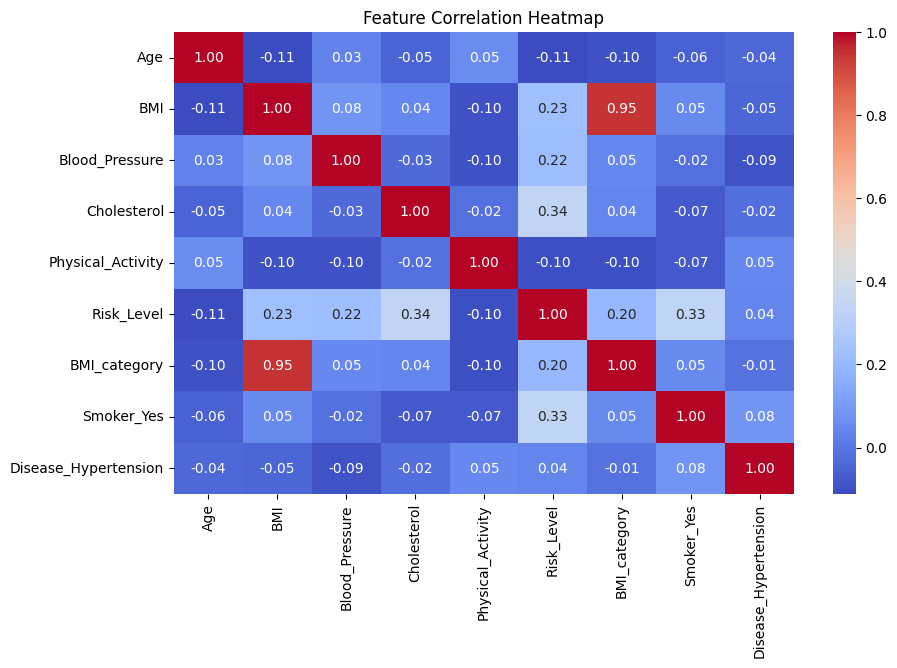

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


#Splitting Data for ML

In [ ]:
X = df.drop( columns="charges")

In [ ]:
y = df['charges']

In [ ]:
X

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,1
1,18,33,1,1,0,0,1,0
2,28,33,3,1,0,0,1,0
3,33,22,0,1,0,1,0,0
4,32,28,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
2767,47,45,1,0,0,0,1,0
2768,21,34,0,0,0,0,0,1
2769,19,26,1,1,1,1,0,0
2770,23,18,0,1,0,1,0,0


In [ ]:
X

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,1
1,18,33,1,1,0,0,1,0
2,28,33,3,1,0,0,1,0
3,33,22,0,1,0,1,0,0
4,32,28,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
2767,47,45,1,0,0,0,1,0
2768,21,34,0,0,0,0,0,1
2769,19,26,1,1,1,1,0,0
2770,23,18,0,1,0,1,0,0


##### Split to :X_train , X_test , y_train , y_test

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42  )

In [ ]:
X_train

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
2128,0.967638,0.619755,0,1,1,0,0,0
2720,-1.525620,0.122363,0,0,0,0,0,0
2236,-0.172137,-0.043434,0,0,1,0,0,0
265,0.468986,1.946134,3,1,1,0,1,0
2063,1.466289,0.122363,3,1,1,1,0,0
...,...,...,...,...,...,...,...,...
1642,1.181345,0.453958,0,1,1,1,0,0
1099,-1.026969,0.453958,1,0,0,0,1,0
1134,-0.813261,0.453958,0,1,0,1,0,0
1298,-0.457081,-0.540826,2,1,0,1,0,0


In [ ]:
X_test

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
1382,-1.311912,0.619755,0,0,0,0,0,1
843,1.252581,-0.209231,0,0,1,0,1,0
2168,0.825166,0.785553,1,1,0,0,1,0
2623,1.323817,-0.375028,0,0,0,1,0,0
931,-0.029666,0.288161,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
878,0.112806,-0.375028,1,1,0,0,0,1
2035,1.323817,0.288161,0,0,0,0,0,0
104,-0.385845,-0.540826,1,0,0,0,0,1
319,-0.528317,1.117147,1,1,0,0,0,0


In [ ]:
y_train

,charges
2128,43254
2720,2205
2236,37270
265,46151
2063,46130
...,...
1642,43921
1099,3227
1134,19673
1298,5261


In [ ]:
y_test

array([[-9.36960335e-01],
       [ 1.15650725e+00],
       [-3.32543676e-01],
       [-9.96717676e-02],
       [-5.90852615e-01],
       [-7.18201875e-01],
       [-4.75893649e-01],
       [ 1.92495172e+00],
       [-9.88572890e-01],
       [-5.49168707e-01],
       [-3.22861194e-01],
       [-2.73464122e-01],
       [-3.94823372e-01],
       [-3.49939322e-01],
       [-3.13588986e-01],
       [-9.58376673e-01],
       [-1.68844079e-01],
       [-2.92008538e-01],
       [-9.59279277e-01],
       [-9.25800863e-01],
       [-8.10923953e-01],
       [-5.05269316e-01],
       [ 1.04398858e-01],
       [ 2.42310724e+00],
       [-3.89818021e-01],
       [-1.00728141e+00],
       [ 5.52911139e-01],
       [-9.99240031e-01],
       [-4.28301786e-01],
       [-2.93157307e-01],
       [-7.50203300e-01],
       [-6.05540448e-01],
       [-2.64602189e-01],
       [-8.78701330e-01],
       [ 2.87834803e+00],
       [-6.91451966e-01],
       [-9.27441962e-01],
       [ 5.57588270e-01],
       [-2.0

#Feature Scaling

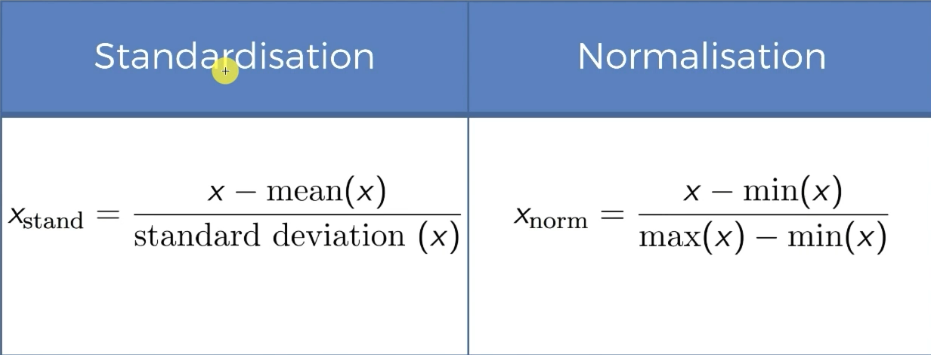

**-Normalization:**

When to use:
- When the distribution of the data is not Gaussian (not normally distributed).

- scales values between a fixed range (typically [0,1] or [-1,1]).

**Standardization :**

- When to use: it works all the time( regardless of the data distribution)

- Scales data to have a mean of 0 and a standard deviation of 1,

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
columns_to_scale = ["age", "bmi"]     #---------------->Determine the columns need to be scaled

scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

print("Scaled data example:\n", X_train[:5])

Scaled data example:
            age       bmi  children  gender_male  smoker_yes  region_northwest  \
2128  0.967638  0.619755         0            1           1                 0   
2720 -1.525620  0.122363         0            0           0                 0   
2236 -0.172137 -0.043434         0            0           1                 0   
265   0.468986  1.946134         3            1           1                 0   
2063  1.466289  0.122363         3            1           1                 1   

      region_southeast  region_southwest  
2128                 0                 0  
2720                 0                 0  
2236                 0                 0  
265                  1                 0  
2063                 0                 0  


In [ ]:
scale_Y = True  # Set to True if scaling is needed

if scale_Y:
    # Scale the target variable (y_train and y_test)
    scaler = StandardScaler()
    y_train = scaler.(y_fit_transformtrain.values.reshape(-1, 1))
    y_test = scaler.transform(y_test.values.reshape(-1, 1))

    print("Scaled target data example:\n", y_train[:5])
else:
    print("Target variable scaling skipped.")

Scaled target data example:
 [[ 2.4464929 ]
 [-0.92178017]
 [ 1.95547616]
 [ 2.68420605]
 [ 2.68248289]]


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model= LinearRegression()
lr_model.fit(X_train , y_train.ravel())



LinearRegression()

In [ ]:
lr_predictions = lr_model.predict(X_test)

In [ ]:
lr_predictions

array([-7.74274600e-01,  1.81523489e+00, -6.35430380e-02, -9.26415098e-02,
       -3.99067325e-01, -1.15146744e-01, -2.09867695e-01,  1.13125154e+00,
       -8.33113150e-01, -4.36192533e-01,  1.06520176e-01, -2.08560462e-01,
       -5.15687300e-01, -1.72210426e-01, -2.22801053e-01, -6.46232417e-01,
        4.42522895e-01,  5.93166037e-02, -8.74443956e-01, -9.18388299e-01,
       -5.68229935e-01, -4.41255172e-01,  8.67545353e-01,  1.84354954e+00,
       -4.31203413e-01, -3.05700775e-01, -7.34628220e-01, -8.31631663e-01,
       -3.27156841e-01, -6.00554835e-02, -9.35787366e-01, -4.95600923e-01,
       -1.98167379e-01, -5.75409935e-01,  2.23587660e+00, -4.78332062e-01,
       -7.05201174e-01,  1.36207755e+00, -2.39072179e-02, -3.49580488e-01,
       -1.25952830e+00, -7.68420981e-01, -1.43002108e-01, -3.70273313e-01,
       -6.10996969e-01, -7.95353472e-01, -3.95294204e-01, -1.18672612e-01,
        2.01812136e+00, -3.44425702e-01, -4.34424329e-01,  2.79205296e-01,
       -1.35104365e-01, -

In [ ]:
from sklearn.metrics import mean_squared_error , r2_score

r2_score(y_test , lr_predictions)

0.7430107352770725

In [ ]:
mean_squared_error(y_test , lr_predictions)

0.2466030866761098

Text(0.5, 1.0, 'Linear Regression: Actual vs Predicted')

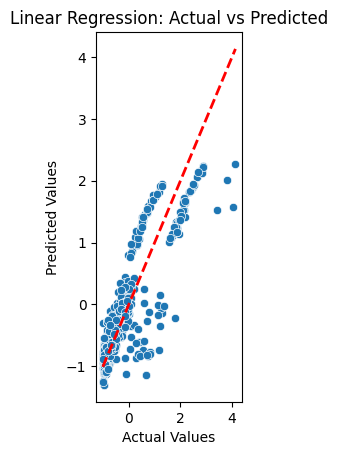

In [ ]:
plt.subplot(131)
sns.scatterplot(x=y_test.ravel(), y=lr_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')

In [ ]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

# Create and train model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train.ravel())

DecisionTreeRegressor(random_state=42)

In [ ]:
dt_predictions = dt_model.predict( X_test)

In [ ]:
dt_predictions

array([-9.36960335e-01,  1.15650725e+00, -3.32543676e-01, -9.96717676e-02,
       -5.90852615e-01, -7.18201875e-01, -4.75893649e-01,  1.92495172e+00,
       -9.88572890e-01, -5.49168707e-01, -3.22861194e-01, -2.73464122e-01,
       -3.94823372e-01, -3.49939322e-01, -3.13588986e-01, -9.58376673e-01,
       -1.68844079e-01, -2.92008538e-01, -9.59279277e-01, -9.25882918e-01,
       -8.42515103e-01, -5.05269316e-01,  1.04398858e-01,  2.42310724e+00,
       -3.89818021e-01, -1.00728141e+00,  5.52911139e-01, -9.99240031e-01,
       -4.28301786e-01, -2.93157307e-01, -7.50203300e-01, -6.05540448e-01,
       -2.64602189e-01, -8.78701330e-01,  2.87834803e+00, -6.91451966e-01,
       -9.27441962e-01,  5.57588270e-01, -2.35882961e-01, -6.81113044e-01,
       -1.00079907e+00, -7.71865803e-01, -4.02126262e-01, -4.75811594e-01,
        5.11555451e-01, -7.59311398e-01, -3.67088804e-01, -4.67606101e-01,
        3.82230801e+00,  8.52800582e-02, -7.19514754e-01,  6.32893354e-02,
        1.27056361e+00, -

In [ ]:
# Calculate metrics
dt_r2 = r2_score(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)

print("Decision Tree Results:")
print(f"R2 Score: {dt_r2:.4f}")
print(f"MSE: {dt_mse:.4f}")
print(f"RMSE: {dt_rmse:.4f}")

Decision Tree Results:
R2 Score: 0.9450
MSE: 0.0528
RMSE: 0.2297


In [ ]:
from  sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train , y_train.ravel())

RandomForestRegressor(random_state=42)

In [ ]:
rf_predict= rf_model.predict(X_test)

In [ ]:
r2_score(y_test, rf_predict)


0.9522529894293472

In [ ]:
# Calculate metrics
r2_score(y_test, rf_predict)
mean_squared_error(y_test, rf_predict)


0.04581732314372947

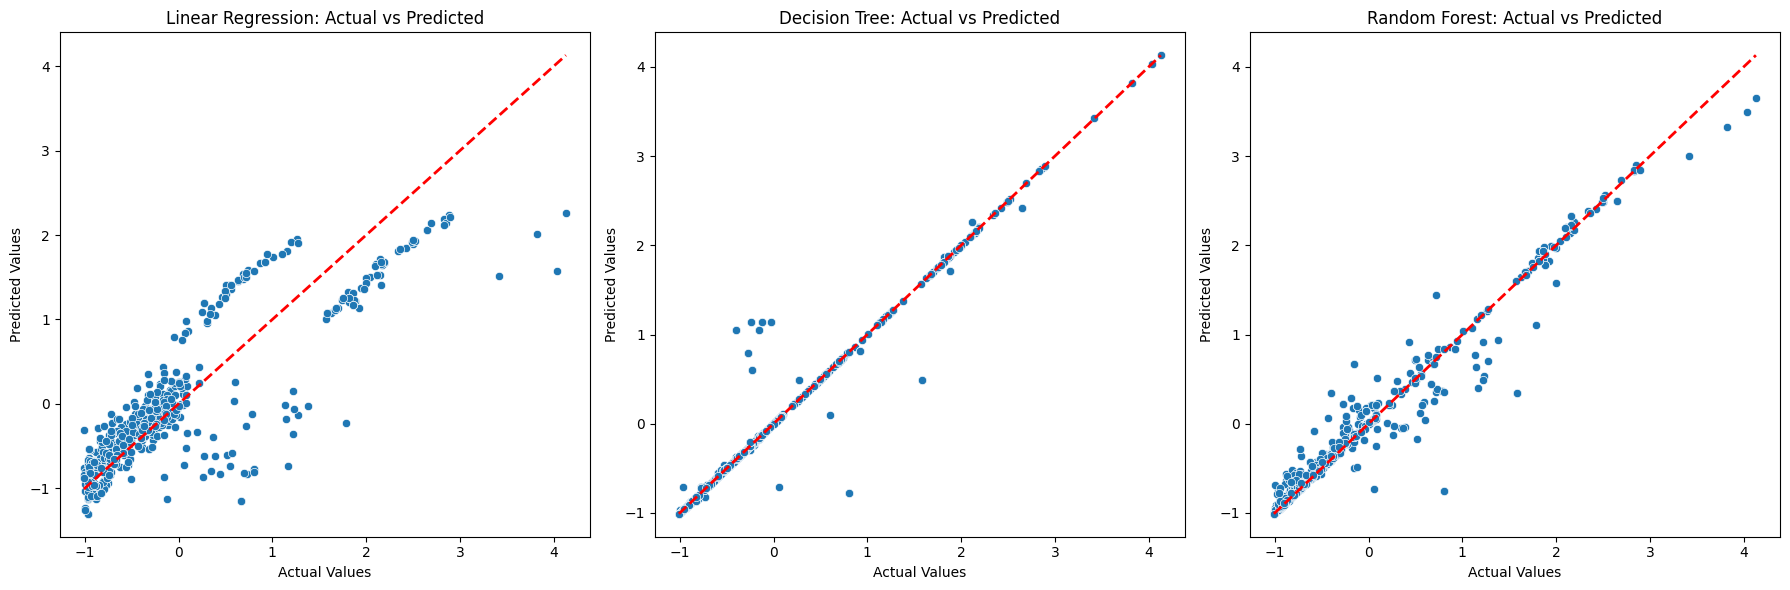

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create scatter plots for each model
plt.figure(figsize=(18, 6))

# Linear Regression scatter plot
plt.subplot(131)
sns.scatterplot(x=y_test.ravel(), y=lr_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')

# Decision Tree scatter plot
plt.subplot(132)
sns.scatterplot(x=y_test.ravel(), y=dt_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs Predicted')

# Random Forest scatter plot
plt.subplot(133)
sns.scatterplot(x=y_test.ravel(), y=rf_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')

plt.tight_layout()
plt.show()

### **MACHINE LEARNING**

In [ ]:
#Tuseday lecture
#data preprocessing uses up to 80% of the work effort
#uses more than one tool to build a model
#more understanding of the process if you do it step by step to rely on understanding rather than memorising


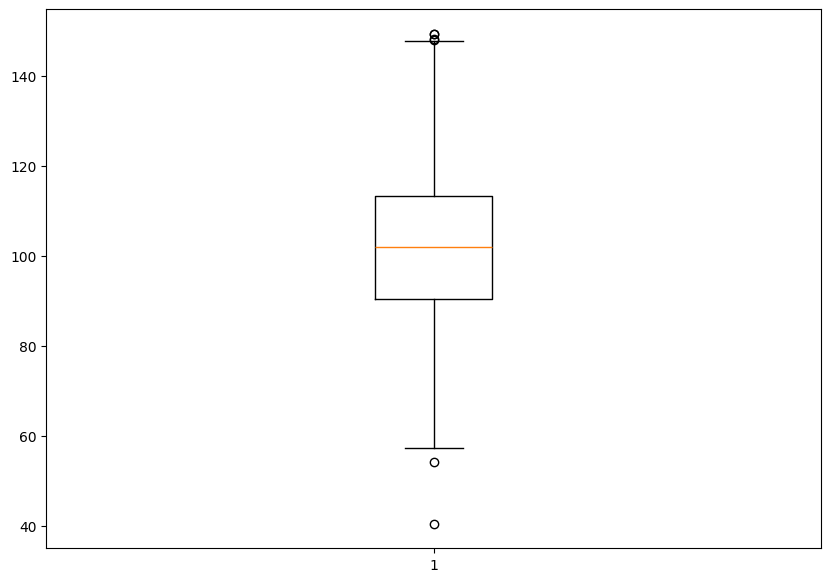

In [ ]:
#box plot
import matplotlib.pyplot as plt
import numpy as np


# Creating dataset
np.random.seed(10)
data = np.random.normal(100, 20, 200)

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data)

# show plot
plt.show()

In [ ]:
data = data[(data['BIM']>=12) & (data['bmi'] <50)] #precets so the values are saved in a boolean format for the (&)

In [ ]:
data['bmi'] = data['bmi'].clip(lower=12, upper=50)

In [ ]:
data.column

In [ ]:
data['gender'].unique()

In [ ]:
data = data.dope(data[data['gender'] == "other"].index) # data.drop(1,54,689,2000) <- the index of the deleted row (removes the specified row) (they were 18)

In [ ]:
#check
data[data['gender'] == "other"]

In [ ]:
data.shape()

In [ ]:
data['smoking_history'].value_count()

In [ ]:
data['smoking_history'] = data['smoking_history'].replace('not current', 'former')

In [ ]:
data = data.astype(int)

In [ ]:
#balancing to pervent biasing
#lazy model will gess a patient is diabetic